In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Raw data location
source_csv = '/home/andris/GitHub/data/churn_prediction/user_teach_stuff.csv'
user_source = '/home/andris/GitHub/data/churn_prediction/for_users.csv'

# Save location of new dataframe
save_dir = '/home/andris/GitHub/data/churn_prediction/usr_with_tch_complete.csv'

## User activity

Activity of the user, and the activity of their teacher. 

In [8]:
# Dataframe of all events created by a user within a 30 day period

df = pd.read_csv(source_csv)

df.head()

,user_id,event_leg,grp_add_assig,grp_add_user,grp_added,play_video,q_lvl_0,q_lvl_0_cor,q_lvl_1,q_lvl_1_cor,...,q_lvl_6,q_lvl_6_cor,tch_add_assig,tch_add_user,tch_added,tch_attempt,tch_create_group,tch_view_assig_prog,view_concept,view_hint
0,0009111939b7d071597369a67002b22853c08e19f463cf...,-6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,6.0,0.0,25.0,0.0,0.0,0.0,0.0
1,0009111939b7d071597369a67002b22853c08e19f463cf...,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,11.0,0.0,21.0,0.0,13.0,0.0,0.0
2,0009111939b7d071597369a67002b22853c08e19f463cf...,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
3,0009111939b7d071597369a67002b22853c08e19f463cf...,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0009111939b7d071597369a67002b22853c08e19f463cf...,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# All events before user registration correspond to actions done by their teacher, we can accumulate these to provide an
# idea of standing power of the teacher

df = df.groupby(['user_id','event_leg']).sum()

# Extract the events that occured after user registration 
df_1 = df[df.index.get_level_values(1)>-1] # Activities following user registration

# Extract the events that happened before user registration, sum them and set event_leg at 0 
rep_features = ['grp_add_assig','grp_add_user','tch_add_assig','tch_add_user','tch_attempt','tch_create_group','tch_view_assig_prog']
month_array = range(int(min(df.index.get_level_values(1))),0)
df_2 = df[df.index.get_level_values(1).isin(month_array)]
df_2 = df_2.reset_index().groupby('user_id').sum()[rep_features]
df_2.columns = df_2.columns + '_tot'
df_2['event_leg'] = np.zeros(len(df_2.index))
df_2 = df_2.groupby(['user_id','event_leg']).sum()

# Add these new features to the user dataframe
for rep in rep_features:
    df_1[rep + '_tot'] = df_1[rep]
df_1 = df_1.add(df_2, fill_value=0)

# Do a cumulative sum on the features
for rep in rep_features:
    df_1[rep + '_tot'] = df_1.groupby('user_id')[rep + '_tot'].cumsum()
    
# Print the dataframe
df_1.head()


/home/andris/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


grp_add_assig  \
user_id                                            event_leg                  
0009111939b7d071597369a67002b22853c08e19f463cf2... 0.0                  0.0   
                                                   1.0                  0.0   
                                                   2.0                  0.0   
                                                   3.0                  0.0   
                                                   4.0                  0.0   

                                                              grp_add_assig_tot  \
user_id                                            event_leg                      
0009111939b7d071597369a67002b22853c08e19f463cf2... 0.0                      0.0   
                                                   1.0                      0.0   
                                                   2.0                      0.0   
                                                   3.0                      0.0   
                                                   4.0                      0.0   

                                                              grp_add_user  \
user_id                                            event_leg                 
0009111939b7d071597369a67002b22853c08e19f463cf2... 0.0                 0.0   
                                                   1.0                 0.0   
                                                   2.0                 0.0   
                                                   3.0                 0.0   
                                                   4.0                 0.0   

                                                              grp_add_user_tot  \
user_id                                            event_leg                     
0009111939b7d071597369a67002b22853c08e19f463cf2... 0.0                     0.0   
                                                   1.0                     0.0   
                                                   2.0                     0.0   
                                                   3.0                     0.0   
                                                   4.0                     0.0   

                                                              grp_added  \
user_id                                            event_leg              
0009111939b7d071597369a67002b22853c08e19f463cf2... 0.0              0.0   
                                                   1.0              0.0   
                                                   2.0              0.0   
                                                   3.0              0.0   
                                                   4.0              0.0   

                                                              play_video  \
user_id                                            event_leg               
0009111939b7d071597369a67002b22853c08e19f463cf2... 0.0               1.0   
                                                   1.0               0.0   
                                                   2.0               0.0   
                                                   3.0               0.0   
                                                   4.0               0.0   

                                                              q_lvl_0  \
user_id                                            event_leg            
0009111939b7d071597369a67002b22853c08e19f463cf2... 0.0          321.0   
                                                   1.0           50.0   
                                                   2.0          108.0   
                                                   3.0           34.0   
                                                   4.0           29.0   

                                                              q_lvl_0_cor  \
user_id                                            event_leg                
0009111939b7d071597369a67002b22853c08e19f463cf2... 0.0              137.0   
  

## User registration details

Determine when the user decides to leave the platform.

In [14]:
# Dataframe of user information, here we can determine the last month when they were seen 

df_user = pd.read_csv(user_source)

df_user.head()

,user_id,teacher_id,registration_date,last_seen
0,c13414f5fafb40588a8fbb5cdd1aa96244d46d9aca4ab2...,43bb46ab6f0a3a83dd4cd6ca26072c78fb97b2678c01e1...,2016-08-31 08:52:26.132000,2017-04-22 13:04:21.875000
1,54a8ec5aebf229325c92115c678b5d45856f2838b849e9...,72f0181fe84a472576da8b4f07c354ec2ed54dce331d14...,2016-08-31 09:42:30.493000,2016-09-30 19:42:31.055000
2,673c8a5c47f47b8ad8a5134e0832d3103fd36047947e16...,b794d01f76a055086071192633c3c33f3ad6c85c976160...,2016-08-31 09:49:32.085000,2017-10-09 09:27:01.409000
3,ff54cd3eac2e9621869257dc0f2dff7f3a3afb7e723bdf...,9bdf39b7864252a4f4ff3be49684fc03a759fd6814f5dc...,2016-08-31 11:27:15.808000,2017-07-08 23:13:01.619000
4,e4c486b20d9a41636cdc2afa83bbdccba3a7449521ad57...,5aabcddf3a7871fa890e51101c4761460a82c774c17f7b...,2016-08-31 11:44:08.233000,2017-01-29 15:42:13.121000


In [15]:
df_user = df_user.set_index('user_id')

# Determining the month of last activity
df_churn = np.floor((pd.to_datetime(df_user['last_seen'])  - pd.to_datetime(df_user['registration_date'])).dt.total_seconds()/(3600*24*30))
df_churn = df_churn.rename('churn_leg')

df_churn.head()

user_id
c13414f5fafb40588a8fbb5cdd1aa96244d46d9aca4ab227af6160925cc6b921     7.0
54a8ec5aebf229325c92115c678b5d45856f2838b849e9f5866d46c8b0932e9f     1.0
673c8a5c47f47b8ad8a5134e0832d3103fd36047947e16823d358a59aaff4a71    13.0
ff54cd3eac2e9621869257dc0f2dff7f3a3afb7e723bdffa406b397c5d665b2c    10.0
e4c486b20d9a41636cdc2afa83bbdccba3a7449521ad5730e1b31bdf1c4df619     5.0
Name: churn_leg, dtype: float64

In [16]:
# Combine the churn dataframe with activity dataframe

# Adding churn to the big dataframe
df = df_1.reset_index().set_index('user_id').join(df_churn)

# Eliminating events that occur after user churn
df = df[df['event_leg']<=df['churn_leg']]

# Cleaning up
df = df.drop('churn_leg',axis=1)
df = df.groupby(['user_id','event_leg']).sum()

# Printing finalised dataframe
df.head()


grp_add_assig  \
user_id                                            event_leg                  
0009111939b7d071597369a67002b22853c08e19f463cf2... 0.0                  0.0   
                                                   1.0                  0.0   
                                                   2.0                  0.0   
                                                   3.0                  0.0   
                                                   4.0                  0.0   

                                                              grp_add_assig_tot  \
user_id                                            event_leg                      
0009111939b7d071597369a67002b22853c08e19f463cf2... 0.0                      0.0   
                                                   1.0                      0.0   
                                                   2.0                      0.0   
                                                   3.0                      0.0   
                                                   4.0                      0.0   

                                                              grp_add_user  \
user_id                                            event_leg                 
0009111939b7d071597369a67002b22853c08e19f463cf2... 0.0                 0.0   
                                                   1.0                 0.0   
                                                   2.0                 0.0   
                                                   3.0                 0.0   
                                                   4.0                 0.0   

                                                              grp_add_user_tot  \
user_id                                            event_leg                     
0009111939b7d071597369a67002b22853c08e19f463cf2... 0.0                     0.0   
                                                   1.0                     0.0   
                                                   2.0                     0.0   
                                                   3.0                     0.0   
                                                   4.0                     0.0   

                                                              grp_added  \
user_id                                            event_leg              
0009111939b7d071597369a67002b22853c08e19f463cf2... 0.0              0.0   
                                                   1.0              0.0   
                                                   2.0              0.0   
                                                   3.0              0.0   
                                                   4.0              0.0   

                                                              play_video  \
user_id                                            event_leg               
0009111939b7d071597369a67002b22853c08e19f463cf2... 0.0               1.0   
                                                   1.0               0.0   
                                                   2.0               0.0   
                                                   3.0               0.0   
                                                   4.0               0.0   

                                                              q_lvl_0  \
user_id                                            event_leg            
0009111939b7d071597369a67002b22853c08e19f463cf2... 0.0          321.0   
                                                   1.0           50.0   
                                                   2.0          108.0   
                                                   3.0           34.0   
                                                   4.0           29.0   

                                                              q_lvl_0_cor  \
user_id                                            event_leg                
0009111939b7d071597369a67002b22853c08e19f463cf2... 0.0              137.0   
  

In [18]:
# Save the dataframe as a csv file to be used elsewhere

df.to_csv(save_dir)

## Preliminary data analysis

Trying to evaluate if we can categorise the behaviour of the group. Any insights?


Text(0.5,0,'Month')

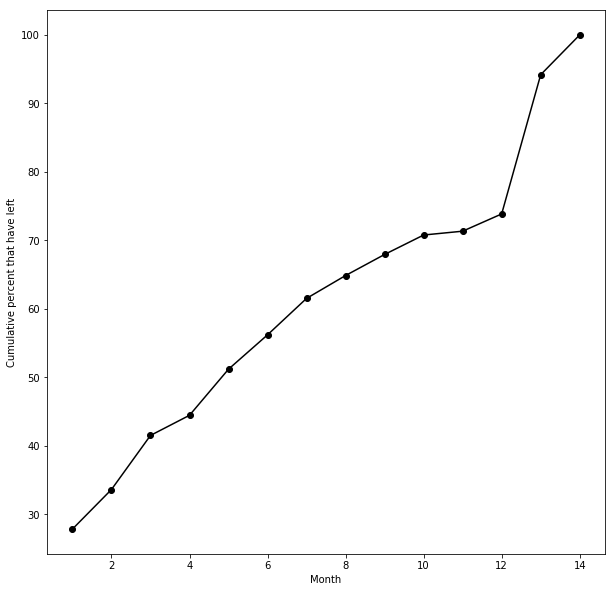

In [42]:
# First let's check the churn pattern 

churn_array = df.reset_index().groupby('user_id')['event_leg'].max().value_counts().sort_index()

plt.figure(figsize=(10,10))
plt.plot(range(1,len(churn_array)+1),churn_array.cumsum()/sum(churn_array)*100,'-ok')
plt.ylabel('Cumulative percent that have left')
plt.xlabel('Month')

(array([ 6307.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  2442.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

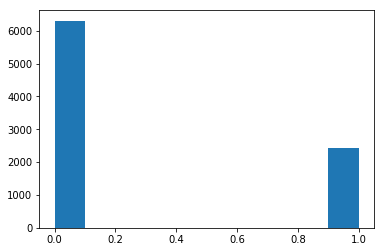

In [88]:
# Alot tend to leave after the first month, can they be?

df_lm = df[df.index.get_level_values(1) == 0]

churn_array = df.reset_index().set_index('user_id').loc[df_lm.reset_index().set_index('user_id').index].groupby('user_id')['event_leg'].max()

label = [1 if item == 0 else 0 for item in churn_array]

plt.hist(label)


In [94]:
df_lm['last_month'] = label


df_lm.head()

/home/andris/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,,grp_add_assig,grp_add_assig_tot,grp_add_user,grp_add_user_tot,grp_added,play_video,q_lvl_0,q_lvl_0_cor,q_lvl_1,q_lvl_1_cor,...,tch_added,tch_attempt,tch_attempt_tot,tch_create_group,tch_create_group_tot,tch_view_assig_prog,tch_view_assig_prog_tot,view_concept,view_hint,last_month
user_id,event_leg,,,,,,,,,,,,,,,,,,,,,
0009111939b7d071597369a67002b22853c08e19f463cf225f985d51a28c00e0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,321.0,137.0,4.0,2.0,...,1.0,13.0,59.0,0.0,0.0,36.0,58.0,3.0,5.0,0
001209cc56f8583d638502e7446dd7461278082d613d4c6d718b5b3fb6d87a72,0.0,0.0,5.0,2.0,5.0,2.0,3.0,348.0,134.0,0.0,0.0,...,1.0,33.0,477.0,0.0,3.0,66.0,136.0,0.0,13.0,0
001ed4483f258c0e1b75a205f24f7ec2b04490adbddb45eb9bcdb91d1ff1e9be,0.0,16.0,16.0,28.0,28.0,28.0,8.0,0.0,0.0,20.0,60.0,...,4.0,42.0,698.0,0.0,6.0,92.0,180.0,0.0,88.0,0
00310c09b913aa7e422aa50306010d12a23ad40d63eac99e37931f0448c131df,0.0,0.0,3.0,6.0,7.0,6.0,0.0,0.0,0.0,1.0,0.0,...,0.0,2.0,75.0,0.0,4.0,0.0,66.0,1.0,6.0,0
003136aacdfb6e7ee06bdd001b8c5351ddb3ad360c30bcac094c645f4f1cec68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,19.0,0.0,0.0,...,1.0,32.0,88.0,0.0,0.0,275.0,275.0,0.0,0.0,0


In [126]:
df_lm.keys()

Index(['grp_add_assig', 'grp_add_assig_tot', 'grp_add_user',
       'grp_add_user_tot', 'grp_added', 'play_video', 'q_lvl_0', 'q_lvl_0_cor',
       'q_lvl_1', 'q_lvl_1_cor', 'q_lvl_2', 'q_lvl_2_cor', 'q_lvl_3',
       'q_lvl_3_cor', 'q_lvl_4', 'q_lvl_4_cor', 'q_lvl_5', 'q_lvl_5_cor',
       'q_lvl_6', 'q_lvl_6_cor', 'tch_add_assig', 'tch_add_assig_tot',
       'tch_add_user', 'tch_add_user_tot', 'tch_added', 'tch_attempt',
       'tch_attempt_tot', 'tch_create_group', 'tch_create_group_tot',
       'tch_view_assig_prog', 'tch_view_assig_prog_tot', 'view_concept',
       'view_hint', 'last_month'],
      dtype='object')

/home/andris/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c8a4183c8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f4c8a365828>], dtype=object)

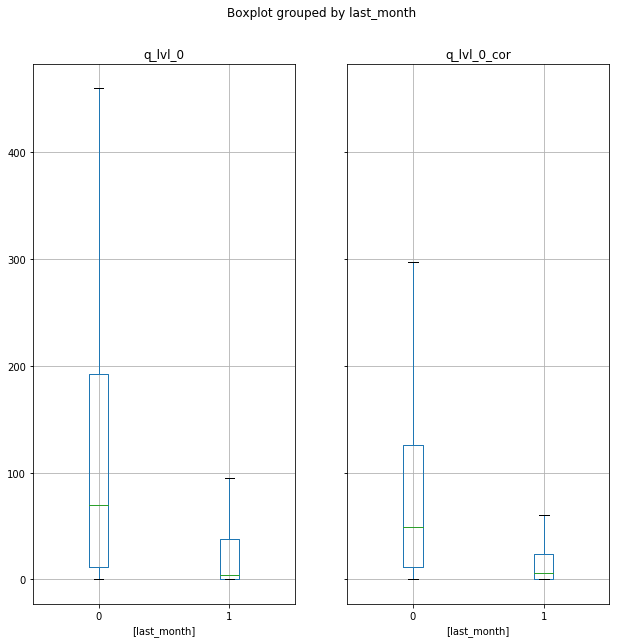

In [104]:
# Now we can check if there are any significant differences, between the 2 labels,

df_lm.filter(regex='q_lvl_0|last_month|q_lvl_0_c').boxplot(by='last_month', figsize=(10,10),showfliers=False)

/home/andris/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c89cf6dd8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f4c89cb6780>], dtype=object)

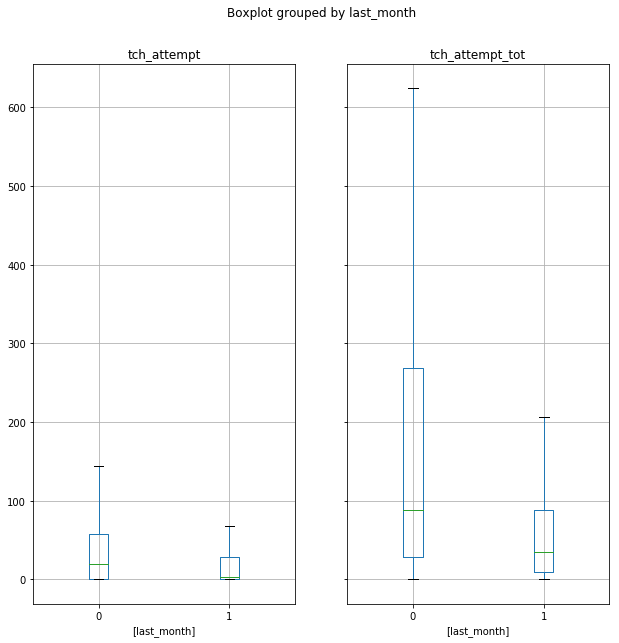

In [118]:
df_lm.filter(regex='tch_attempt|last_month').boxplot(by='last_month', figsize=(10,10),showfliers=False)

/home/andris/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c89a42400>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f4c89a28a90>], dtype=object)

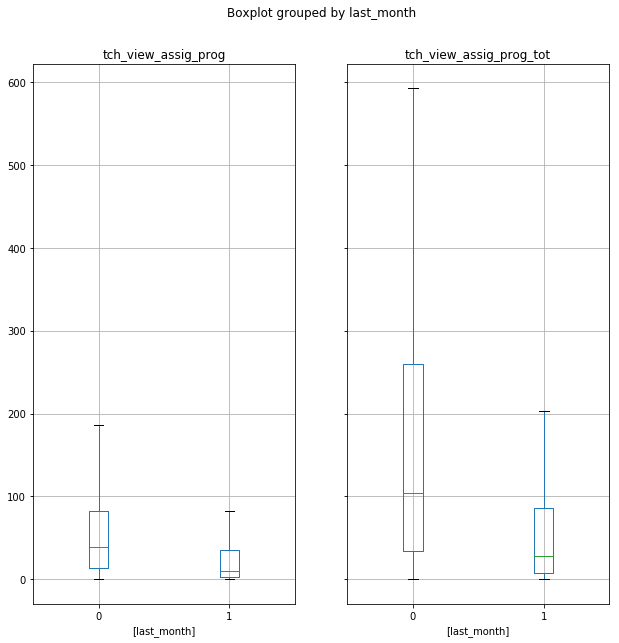

In [121]:
df_lm.filter(regex='tch_view_assig|last_month').boxplot(by='last_month', figsize=(10,10),showfliers=False)

/home/andris/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c894e9048>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f4c894a2550>], dtype=object)

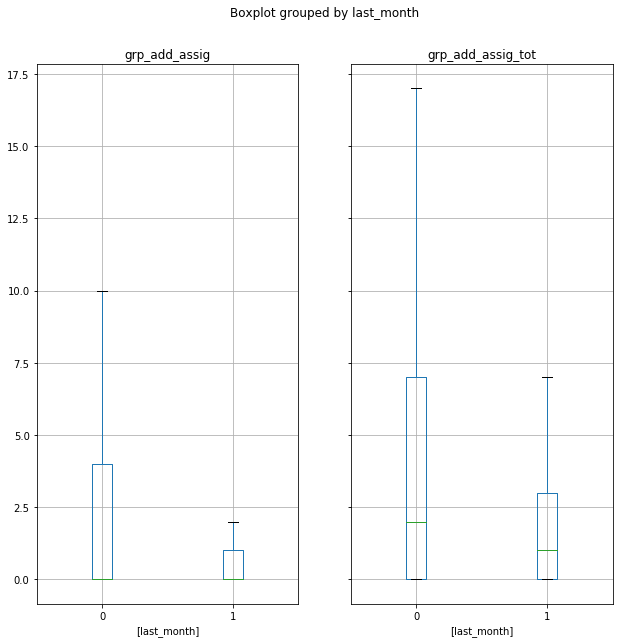

In [125]:
df_lm.filter(regex='grp_add_ass|last_month').boxplot(by='last_month', figsize=(10,10),showfliers=False)